# **Projeto: Análise dos Acidentes em Rodovias e Posicionamento de Radares**


## **1 - Entendimento do Problema de Negócio**


Imagine que estamos investigando como os radares nas estradas afetam a segurança e o tráfego. Queremos entender se eles realmente ajudam a evitar acidentes e como podem ser melhorados.

Vamos usar dados do governo para ver onde acontecem mais acidentes e onde estão os radares. A ideia é descobrir se os radares estão nos lugares certos e se estão fazendo nosso trânsito mais seguro.

Queremos sugerir maneiras de tornar nossas estradas mais seguras e eficientes para todos nós. Vamos utilizar esses números para descobrir como podemos melhorar a qualidade do transito nas estradas do nosso país.

Ao realizar uma análise de dados sobre acidentes em rodovias e o posicionamento de radares, há várias questões de negócio adicionais que você pode explorar para obter insights úteis e oferecer sugestões para melhorias.

1. **Análise de Eficiência dos Radares:** Além de avaliar a eficácia dos radares em geral, analisar a eficiência de radares em áreas específicas ou em diferentes tipos de rodovias (por exemplo, estradas simples versus estradas duplicadas).

2. **Identificação de Pontos Críticos:** Identificar os locais onde ocorrem mais acidentes e avaliar se radares estão presentes nesses pontos. Isso pode ajudar a determinar se os radares estão posicionados nos lugares certos.

3. **Correlação entre Radares e Acidentes:** Realizar uma análise estatística para identificar se há uma correlação significativa entre a presença de radares em determinadas áreas e a redução da frequência de acidentes.

4. **Análise de Velocidade Média:** Analisar a velocidade média dos veículos em diferentes trechos de rodovia com e sem radares. Isso pode ajudar a entender se os radares estão influenciando o comportamento dos motoristas.

5. **Avaliação de Impacto Econômico:** Além da segurança, considerar o impacto econômico dos acidentes, como custos médicos, perda de produtividade e danos materiais. Isso pode ajudar a justificar investimentos em radares.



## **2 - Entendimento dos Dados**


### **2.1 - Dados Acidentes Rodovias PRF**


#### **2.1.1 - Sobre os dados da PRF.**

Os dados de acidentes de trânsito utilizados neste estudo foram coletados da [base pública da Polícia Rodoviária Federal (PRF)](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf) e abrangem o período de janeiro a julho de 2023. Essa base oficial e de acesso público contém registros abrangentes de acidentes ocorridos nas rodovias de todo o Brasil durante esse intervalo.

Essas informações representam um recurso fundamental para nossa análise, possibilitando uma compreensão aprofundada e embasada sobre a segurança nas estradas. A disponibilidade desses dados contribui significativamente para tomadas de decisões informadas e a implementação de medidas que visam aprimorar a segurança viária em todo o país.

#### **2.1.2 - Dicionário de Dados.**

* `id` - Número de identificação único para cada registro no conjunto de dados.

* `data_inversa` - Data do acidente no formato AAAAMMDD (exemplo: 2023-03-13).

* `dia_semana` - Dia da semana em que o acidente ocorreu (exemplo: segunda-feira).

* `horario` - Hora do acidente no formato HH:MM:SS (exemplo: 18:10:00).

* `uf` - Unidade Federativa onde o acidente ocorreu (exemplo: ES - Espírito Santo).

* `br` - Número da rodovia onde o acidente ocorreu (exemplo: 101.0).

* `km` - Quilômetro exato da rodovia onde o acidente ocorreu (exemplo: 293,6).

* `municipio` - Município onde o acidente ocorreu (exemplo: CARIACICA).

* `causa_acidente` - Causa principal do acidente (exemplo: Ausência de sinalização).

* `tipo_acidente` - Tipo de acidente (exemplo: Atropelamento de Pedestre).

* `classificacao_acidente` - Classificação do acidente (exemplo: Com Vítimas Feridas).

* `fase_dia` - Fase do dia em que o acidente ocorreu (exemplo: Anoitecer).

* `sentido_via` - Sentido da via no momento do acidente (exemplo: Crescente).

* `condicao_metereologica` - Condição meteorológica no momento do acidente (exemplo: Céu Claro).

* `tipo_pista` - Tipo de pista (exemplo: Múltipla).

* `tracado_via` - Traçado da via no momento do acidente (exemplo: Reta).

* `uso_solo` - Se a área onde o acidente ocorreu é utilizada para fins agrícolas ou não (exemplo: Sim).

* `pessoas` - Número total de pessoas envolvidas no acidente (exemplo: 2).

* `mortos` - Número de pessoas mortas no acidente (exemplo: 0).

* `feridos_leves` - Número de pessoas com ferimentos leves no acidente (exemplo: 0).

* `feridos_graves` - Número de pessoas com ferimentos graves no acidente (exemplo: 1).

* `ilesos` - Número de pessoas ilesas no acidente (exemplo: 1).

* `ignorados` - Número de pessoas cujo estado não foi informado no acidente (exemplo: 0).

* `feridos` - Número total de pessoas feridas no acidente (exemplo: 1).

* `veiculos` - Número total de veículos envolvidos no acidente (exemplo: 1).

* `latitude` - Coordenada de latitude do local do acidente (exemplo: -20.324159).

* `longitude` - Coordenada de longitude do local do acidente (exemplo: -40.395290).

* `regional` - Regional de tráfego onde o acidente ocorreu (exemplo: SPRF-ES).

* `delegacia` - Delegacia responsável pelo registro do acidente (exemplo: DEL01-ES).

* `uop` - Unidade Operacional da Polícia Rodoviária responsável pelo atendimento do acidente (exemplo: UOP01-DEL01-ES).

In [46]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### **2.1.3 - Visualização da Base de Dados.**

In [2]:
# Importar dados da PRF
datapath_prf = '/content/drive/MyDrive/2. Study  Work/Pod Academy/Monitoria/2. Projeto: Análise dos Acidentes em Rodovias e Posicionamento de Radares/Dados_PRF_2023.csv'

df00_prf = pd.read_csv(datapath_prf,
                       sep = ';',
                       encoding = 'latin1')

df00_prf.shape

(32440, 30)

In [3]:
# Visualizar 5 primeiras linhas
df00_prf.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [4]:
# Visualizar 5 últimas linhas
df00_prf.tail()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
32435,536157,2023-06-25,domingo,05:10:00,SP,101.0,41,UBATUBA,Ingestão de álcool pelo condutor,Tombamento,...,0,1,0,0,1,"-23,41971433","-45,0428663",SPRF-SP,DEL06-SP,UOP01-DEL06-SP
32436,536172,2023-06-23,sexta-feira,02:30:00,RS,386.0,"279,4",SAO JOSE DO HERVAL,Condutor Dormindo,Saída de leito carroçável,...,1,0,0,1,1,"-29,02337709","-52,31543541",SPRF-RS,DEL04-RS,UOP03-DEL04-RS
32437,536173,2023-06-24,sábado,13:40:00,PR,163.0,"133,3",CAPITAO LEONIDAS MARQUES,Retorno proibido,Colisão transversal,...,0,2,0,3,2,"-25,55452378","-53,58756077",SPRF-PR,DEL05-PR,UOP05-DEL05-PR
32438,536265,2023-01-09,segunda-feira,10:00:00,MG,267.0,"80,5",JUIZ DE FORA,Condutor Dormindo,Saída de leito carroçável,...,0,1,0,0,1,"-21,75478617","-43,21241781",SPRF-MG,DEL05-MG,UOP01-DEL05-MG
32439,536330,2023-06-02,sexta-feira,15:30:00,SC,470.0,60,BLUMENAU,Retorno proibido,Colisão transversal,...,0,0,1,1,2,"-26,87957612","-49,1716308",SPRF-SC,DEL04-SC,UOP01-DEL04-SC


In [5]:
# Criar variável para metadados
# (nomes das colunas, tipos, quantidade de nulos, percentual de nulos, cardinalidade)

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [6]:
# Verificar metadados
generate_metadata(df00_prf)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.00,32440
1,veiculos,int64,0,0.00,12
2,feridos,int64,0,0.00,28
3,ignorados,int64,0,0.00,10
4,ilesos,int64,0,0.00,43
5,feridos_graves,int64,0,0.00,14
6,feridos_leves,int64,0,0.00,24
7,mortos,int64,0,0.00,8
8,pessoas,int64,0,0.00,48
9,br,float64,78,0.24,114


-  A partir dos metadados gerados, um primeiro ponto a se verificar é a presença de valores nulos nas variáveis, `delegacia`, `km`, `uop`, `regional` e `br`. Apesar da presença dos nulos na tabela, será possível manter a consistência na análise dessas colunas visto que a coluna com maior presença de nulos é a `delegacia`, com apenas 0.93% dos valores nulos.

- O preenchimento dos valores nulos será feito na próxima etapa do projeto. Sendo que, as variáveis do tipo objeto serão preenchidos com o valor "desconhecido". Enquanto a variável `br`, numérica, será preenchida com o valor '999', visto que não existe a uma rodovia "BR-999" - de modo que essas entradas fiquem destacadas do restante dos valores presentes.

- As variáveis `longitude` e `latitude` se encontram como objeto. Será preciso ajustá-las para numéricas, para nossas análises.

- As coluna `horário` e `data_inversa` também serão ajustadas. Neste caso, serão ajustadas para o formato de datetime.

In [7]:
# Análise estatística das variáveis numéricas
df00_prf.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,32440.000000,32362.000000,32440.000000,32440.000000,32440.000000,32440.000000,32440.000000,32440.000000,32440.000000,32440.000000
mean,515154.342170,209.846147,2.457614,0.081936,0.874723,0.277435,1.067109,0.156412,1.152158,1.664365
std,10528.741985,129.455175,2.166629,0.325561,1.083875,0.617148,1.758439,0.443078,1.194990,0.720026
min,496506.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,506122.750000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,515290.500000,155.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,524296.250000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,536330.000000,495.000000,65.000000,7.000000,61.000000,29.000000,58.000000,14.000000,62.000000,12.000000


- A quantidade de acidentes registrados é de 32.440 ao longo das rodovias federais brasileiras.

- O maior número de pessoas envolvidas em um acidente registrado, foi de 65 pessoas. Sendo que, a média de pessoas envolvidas por acidente é de 2.45 pessoas por acidente, que se aproxima da mediana, 2.

- Já a quantidade de vítimas fatais nos acidentes registrados, tem a média de 0.08 pessoas, o que leva-se a considerar que um pequena parcela dos acidentes há vítimas fatais.

- A quantidade de feridos, dentre graves e leves, é de certa de 1.15 pessoas por acidente, sendo que o acidente com maior número de feridos houve 62 pessoas que não passaram ilesas. Desta média mencionada, 0.88 correspondem a pessoas com ferimentos leves e 0.28 à ferimentos mais graves.

- A média de veículos envolvidos em cada acidente é cerca de 1.67. Ou seja, isso indica que a maioria dos acidentes envolve um ou dois veículos.

In [8]:
# Análise estatística das variáveis tipo objeto
df00_prf.describe(include = 'object')

,data_inversa,dia_semana,horario,uf,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,latitude,longitude,regional,delegacia,uop
count,32440,32440,32440,32440,32362,32440,32440,32440,32440,32440,32440,32440,32440,32440,32440,32440,32440,32437,32138,32422
unique,181,7,1307,27,6076,1705,71,16,3,4,3,9,3,10,2,20402,20401,28,146,392
top,2023-06-11,domingo,18:00:00,MG,1,BRASILIA,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,"-27,59193546","-48,61824557",SPRF-MG,DEL01-PR,UOP01-DEL01-SP
freq,248,5375,470,4234,152,464,4672,6179,24829,17746,17548,20144,15971,18001,18903,47,47,4230,1170,542


- **Dia com mais acidentes:** No período de tempo considerado em nossa base de dados, o dia 11/Jun/2023 foi a data que apresentou mais registros de acidentes nas rodovias federais, com 248 acidentes registrados.

- **Dia da semana e horário com mais ocorrencias:** o dia da semana mais comum de acontecer acidentes é o domingo, com 5375 registros. Enquanto o horário mais comum de ocorrer acidentes são as 18 horas.

- **Causa de acidente mais comum:** a reção tardia ou ineficiência do condutor são as causas mais frequentes de acidentes, dentre as 71 causas encontradas na base de dados.

- **Fase do dia e condição climática mais frequentes:** a maioria dos acidentes ocorrem em plena luz do dia com o céu claro. Apesar de que podem ser consideradas as melhores condições para se dirigir, é a condição em que ocorrem mais casos de acidentes.

- **Traçado da pista com mais acidentes:** outra observação interessante é que o traçado da via em que ocorreu mais acidentes foram em trechos de reta nessas rodovias, com 18.001 registros de acidentes neste traçado.   

### **2.2 - Dados Radares Rodovias Federais.**


#### **2.2.1 - Sobre os dados dos Radares nas Rodovias Federais.**

Os dados sobre os radares de trânsito nas rodovias federais do Brasil são acessíveis ao público por meio do portal "Dados.gov.br" do governo federal. Para acessar os dados dos radares de trânsito nas rodovias federais, você pode utilizar o seguinte link: [Acesso aos Dados de Radares](https://dados.gov.br/dados/conjuntos-dados/radar). Essas informações são fornecidas pela Agência Nacional de Transportes Terrestres (ANTT), uma entidade responsável por regulamentar e fiscalizar o transporte terrestre no país.

As concessionárias de rodovias coletam e inserem os dados sobre os radares, que são posteriormente disponibilizados na rede da ANTT. Isso permite o acesso público a informações importantes, como a localização e a operação dos radares, contribuindo para a segurança viária e a tomada de decisões embasadas em dados.

Essa iniciativa demonstra o compromisso do governo com a segurança nas rodovias federais e a importância de dados acessíveis para a melhoria da mobilidade e a prevenção de acidentes.

#### **2.2.2 - Dicionário de Dados.**

- `concessionaria`: Nome da Concessionária que prestou as informações.

- `ano_do_pnv_snv`: Ano que representa as informações no Plano Nacional de Viação e Sistema Nacional de Viação. Ex.: 2017

- `tipo_de_radar`: Tipo de radar (Redutor ou Controlador).

- `rodovia`: Rodovia responsável pela concessionária. Ex.: BR-116.

- `uf`: Sigla do Estado da rodovia. Ex.: SP.

- `km_m`: Representação do quilômetro mais a metragem. Ex.: 317,940.

- `Município`: Município da localização do radar.

- `tipo_de_pista`: Tipo da pista que está localizada a sinalização (principal ou marginal).

- `sentido`: Representação da ordem crescente ou decrescente ou crescente/decrescente.

- `situacao`: Situação atual (ativo ou inativo).

- `data_da_inativacao`: Data de registro, caso a situação seja dada como inativo.

- `latitude`: Representação de Coordenadas. Ex.: -22,490967.

- `longitude`: Representação de Coordenadas. Ex.: -44,561228

- `velocidade_leve`: Velocidade da Rodovia veículos leves

#### **2.2.3 - Visualização da Base de Dados.** (falta fazer observações)

In [9]:
# Importar dados dos radares
datapath_radar = '/content/drive/MyDrive/2. Study  Work/Pod Academy/Monitoria/2. Projeto: Análise dos Acidentes em Rodovias e Posicionamento de Radares/recurso__7649663_json.csv'

df00_radar = pd.read_csv(datapath_radar,
                         sep = ',',
                         encoding = 'UTF-8')

df00_radar.shape

(608, 14)

In [10]:
# Visualizar 5 primeiras linhas
df00_radar.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve
0,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"483,700",Betim,Principal,Crescente,Ativo,NaN,"-19,959486","-44,085386",80
1,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"493,290",Betim,Principal,Crescente,Ativo,NaN,"-19,964349","-44,171924",80
2,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"525,350",Brumadinho,Principal,Crescente,Ativo,NaN,"-20,146664","-44,323897",80
3,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"528,350",Brumadinho,Principal,Decrescente,Ativo,NaN,"-20,167194","-44,334434",80
4,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"568,890",Itaguara,Principal,Decrescente,Ativo,NaN,"-20,410679","-44,526628",80


In [11]:
# Visualizar 5 últimas linhas
df00_radar.tail()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve
603,VIA SUL,2019,Redutor,BR-386,RS,"388,000",Triunfo,Principal,Crescente,Ativo,NaN,"-29,695129","-51,693235",60
604,VIA SUL,2019,Controlador,BR-386,RS,"367,400",Fazenda Vilanova,Principal,Crescente,Ativo,NaN,"-29,581164","-51,841074",100
605,VIA SUL,2019,Controlador,BR-386,RS,"305,000",Pouso Novo,Principal,Crescente,Ativo,NaN,"-29,189548","-52,188429",60
606,VIA SUL,2019,Redutor,BR-386,RS,"270,800",Fontoura Xavier,Principal,Decrescente,Ativo,NaN,"-28,978289","-52,367937",60
607,VIA SUL,2019,Controlador,BR-386,RS,"245,200",Soledade,Principal,Decrescente,Ativo,NaN,"-28,803798","-52,507508",60


In [12]:
# Metadados
generate_metadata(df00_radar)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ano_do_pnv_snv,int64,0,0.0,11
1,velocidade_leve,int64,0,0.0,8
2,data_da_inativacao,float64,608,100.0,0
3,concessionaria,object,0,0.0,20
4,tipo_de_radar,object,0,0.0,2
5,rodovia,object,0,0.0,20
6,uf,object,0,0.0,13
7,km_m,object,0,0.0,576
8,municipio,object,0,0.0,186
9,tipo_pista,object,0,0.0,2


- A variável `data_da_inativacao` conta com 100% de seus valores nulos. Ou seja, isso indica que todos os radares registrados na tabela estão ativos. A partir deste fato, iremos excluir esta coluna na etapa de limpeza dos dados.

- Assim como fizemos na tabela dos acidentes, iremos precisar realizar os tratamentos das colunas `latitude` e `longitude`, para seus formatos corretos.

- De acordo com o dicinário de dados, a coluna `km_m` nos tras duas informações que podem ser úteis em nossa análise. Sendo assim, um tratamento feito será a divisão desta coluna em outras duas, sendo uma correspondente ao `km` e outra à `m`.

- A coluna `ano_do_pnv_snv` precisará ser ajustada para o formato date_time.

In [13]:
# Análise estatística das variáveis numéricas
df00_radar.describe()

,ano_do_pnv_snv,data_da_inativacao,velocidade_leve
count,608.000000,0.0,608.000000
mean,2016.312500,NaN,70.904605
std,4.411425,NaN,20.831262
min,2003.000000,NaN,40.000000
25%,2016.000000,NaN,60.000000
50%,2017.000000,NaN,60.000000
75%,2020.000000,NaN,80.000000
max,2021.000000,NaN,110.000000


- A tabela conta com o registro de 608 radares presentes nas rodovias federais.

- Os dados analisados contam com radares, que representam informações no Plano Nacional de Viação e Sistema Nacional de Viação, do ano de 2003 até 2021.

- A velocidade máxima permitida dentre todos os radares analisados é de 110km/h, para veículos leves. Sendo que, a velocidade máxima média, dentre todos os radares, é de 70.90 km/h.

In [14]:
# Análise estatística das variáveis tipo objeto
df00_radar.describe(include = 'object')

,concessionaria,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,latitude,longitude
count,608,608,608,608,608,608,608,608,608,608,608
unique,20,2,20,13,576,186,2,3,1,590,589
top,CONCEBRA,Controlador,BR-101,GO,"30,000",Anápolis,Principal,Crescente,Ativo,"-22,868429","-43,208744"
freq,102,455,118,149,3,26,588,259,608,2,2


- A concessionária com o maior número de radares registrados é a Concebra.

- Na base de dados, encontramos dois tipos de radares, sendo o "Controlador" o mais comum em rodovias federais, com 455 unidades.

- A análise abrange registros de radares em 20 diferentes rodovias federais, destacando-se a BR-101, que possui a maior quantidade de radares.

- O estado de Goiás lidera em quantidade de radares registrados, com destaque para o município de Anápolis, que abriga 26 radares, a maior quantidade entre os municípios analisados.


## **3 - Preparação dos Dados:**

Nesta etapa, iremos garantir que os dados estejam limpos, sem valores ausentes ou inconsistentes. Assim como, iremos converter as colunas de latitude, longitudade, horário e data inversa para o formato correto.

In [15]:
df01_prf = df00_prf.copy()
df01_radar = df00_radar.copy()

### **3.1 - Dados Acidentes Rodovias PRF**

Antes de prosseguir com a análise dos dados de acidentes em rodovias federais, foram realizados procedimentos de tratamento e adequação das informações. Essas etapas incluíram:

**Tratamento de Valores Nulos:**

- Para as variáveis de tipo "object", os valores nulos foram preenchidos com "desconhecido" para garantir a integridade dos dados.

- Nas variáveis numéricas com valores nulos, esses espaços vazios foram substituídos por "999". Esse valor foi escolhido por ser discrepante em relação aos demais dados das colunas, facilitando sua identificação durante as análises.

**Adequação e Formatação das Colunas:**

- Nas variáveis de latitude e longitude, a vírgula foi substituída por ponto, ajustando o tipo das variáveis para possibilitar análises futuras.

- As colunas "data_inversa" e "horario" foram convertidas para o formato datetime para facilitar o manuseio das informações de data e hora.

- A variável "km" foi dividida em duas colunas: "Km" para representar os valores em quilômetros e "m" para representar os valores em metros referentes ao local do acidente.

#### **3.1.1 - Limpeza dos Dados e Tratamento de Nulos**

In [16]:
# Preencher valores nulos das variáveis "object"
var_categoricas = df01_prf.select_dtypes(include=['object']).columns
df01_prf[var_categoricas] = df01_prf[var_categoricas].fillna('desconhecido')

In [17]:
# Preencher valores nulos das variáveis "numéricas"
var_numericas = df01_prf.select_dtypes(include=['float64','int64']).columns
df01_prf[var_numericas] = df01_prf[var_numericas].fillna(999)

#### **3.1.2 - Adequação dos Tipos das Colunas**

In [18]:
# Ajustar valores dados colunas latitude e longitude. Alterar tipo para numérico.
df01_prf['latitude'] = df01_prf['latitude'].str.replace(',','.').astype(float)
df01_prf['longitude'] = df01_prf['longitude'].str.replace(',','.').astype(float)

In [19]:
# Alterar colunas `horário` e `data_inversa` para datetime.
df01_prf['data_inversa'] = pd.to_datetime(df01_prf['data_inversa'], format='%Y-%m-%d')
df01_prf['horario'] = pd.to_datetime(df01_prf['horario'], format='%H:%M:%S')

In [20]:
# Substitua os valores 'desconhecido' por "0" na coluna 'km' para que possamos convertê-los para inteiros
df01_prf['km'] = df01_prf['km'].replace('desconhecido', 0)

# Ajustar valores da coluna km. Alterar tipo para numérico.
df01_prf['km'] = df01_prf['km'].str.replace(',','.').astype(float)

# Divide a coluna 'km' em 'km' e 'm', considerando o ponto decimal
df01_prf[['km', 'm']] = df01_prf['km'].apply(lambda x: str(x).split('.', 1) if pd.notna(x) else ['0', '0']).apply(pd.Series)

# Converte as colunas 'km' e 'm' para int64
df01_prf['km'] = df01_prf['km'].astype(int)
df01_prf['m'] = df01_prf['m'].astype(int)

# Substitui os valores NaN de 'km' por 'desconhecido' e os valores 0 de 'm' por 'desconhecido'
df01_prf['km'] = df01_prf['km'].astype(str).replace('0', 'desconhecido')
df01_prf['m'] = df01_prf['m'].astype(str).replace('0', 'desconhecido')

In [21]:
# Verificar metadados para validar que as transformações foram efetuadas.
generate_metadata(df01_prf)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,int64,0,0.0,32440
1,data_inversa,datetime64[ns],0,0.0,181
2,horario,datetime64[ns],0,0.0,1307
3,veiculos,int64,0,0.0,12
4,feridos,int64,0,0.0,28
5,ignorados,int64,0,0.0,10
6,ilesos,int64,0,0.0,43
7,feridos_graves,int64,0,0.0,14
8,feridos_leves,int64,0,0.0,24
9,mortos,int64,0,0.0,8


### **3.2 - Dados Radares Rodovias Federais**

Para os dados dos radares das rodovias federais, foram realizados os seguintes tratamentos:

**Tratamento de Valores Nulos:**

- A variável `data_da_inativacao` apresenta 100% de valores nulos, o que indica que todos os radares registrados na tabela estão ativos. Nesse sentido, iremos remover essa coluna durante a etapa de limpeza dos dados.

**Adequação e Formatação das Colunas:**

- Da mesma forma que fizemos na tabela de acidentes, será necessário realizar tratamentos nas colunas `latitude` e `longitude` para garantir que estejam no formato correto.

- Conforme o dicionário de dados, a coluna `km_m` contém duas informações relevantes para nossa análise. Portanto, iremos dividir essa coluna em duas novas colunas, uma para o valor em quilômetros (km) e outra para o valor em metros (m).

- A coluna `ano_do_pnv_snv` precisará passar por um ajuste para ser convertida para o formato datetime.

#### **3.2.1 - Limpeza dos Dados e Tratamento de Nulos**

In [22]:
# Excluir coluna nula ´data_da_inativacao´
df01_radar.drop(columns=['data_da_inativacao'], inplace=True);

In [23]:
df01_radar.shape

(608, 13)

#### **3.2.2 - Adequação dos Tipos das Colunas**

In [24]:
# Ajustar valores dados colunas latitude e longitude. Alterar tipo para numérico.
df01_radar['latitude'] = df01_radar['latitude'].str.replace(',','.').astype(float)
df01_radar['longitude'] = df01_radar['longitude'].str.replace(',','.').astype(float)

In [25]:
# Alterar coluna `ano_do_pnv_snv ` para datetime.
df01_radar['ano_do_pnv_snv '] = pd.to_datetime(df01_radar['ano_do_pnv_snv'], format='%Y')

In [26]:
# Separar variável km_m em duas colunas: km e m
df01_radar[['km', 'm']] = df01_radar['km_m'].str.split(',', expand=True).astype(int)

In [27]:
generate_metadata(df01_radar)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ano_do_pnv_snv,int64,0,0.0,11
1,velocidade_leve,int64,0,0.0,8
2,latitude,float64,0,0.0,590
3,longitude,float64,0,0.0,589
4,ano_do_pnv_snv,datetime64[ns],0,0.0,11
5,km,int64,0,0.0,392
6,m,int64,0,0.0,176
7,concessionaria,object,0,0.0,20
8,tipo_de_radar,object,0,0.0,2
9,rodovia,object,0,0.0,20


## **4 - Análise Exploratória:**

- Visualizar a distribuição dos acidentes e radares em um mapa.

- Analisar a frequência de acidentes por rodovia.

- Avaliar a gravidade dos acidentes (fatais, com feridos, sem vítimas).

### **4.1 - Visualize a distribuição dos acidentes e radares em um mapa.**


In [28]:
import folium
from IPython.display import display

# Crie um mapa centrado nas coordenadas do Brasil
m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)

# Amostragem aleatória dos acidentes e radares
sample_size = 100  # Número de pontos a serem amostrados

if len(df01_prf) > sample_size:
    df01_prf_sample = df01_prf.sample(n=sample_size, random_state=42)

if len(df01_radar) > sample_size:
    df01_radar_sample = df01_radar.sample(n=sample_size, random_state=42)

# Adicione marcadores para cada acidente com tag de motivo
for index, row in df01_prf_sample.iterrows():
    tipo_acidente = row['tipo_acidente']
    folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='red'),
                  popup=folium.Popup(f'Tipo do Acidente: {tipo_acidente}', parse_html=True)).add_to(m)

# Adicione marcadores para cada radar com tag de velocidade
for index, row in df01_radar_sample.iterrows():
    velocidade_leve = row['velocidade_leve']
    folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='blue'),
                  popup=folium.Popup(f'Velocidade do Radar: {velocidade_leve}', parse_html=True)).add_to(m)

# Exiba o mapa diretamente no Colab
display(m)


### **4.2 - Analise a frequência de acidentes por rodovia.**


In [29]:
# Quantidade de rodovias presentes na tabela
df01_prf['br'].nunique()

115

<ipython-input-30-1b9475bc66f7>:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  contagem_resumida = principais_rodovias.append(outras_rodovias).rename(lambda x: str(x))


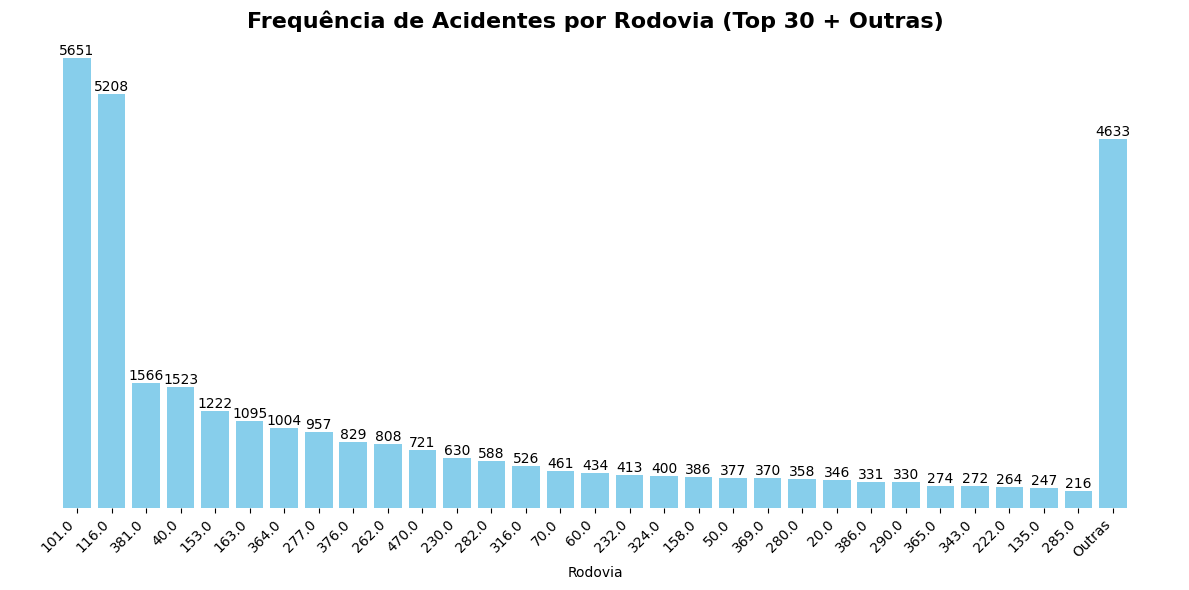

In [30]:
import matplotlib.pyplot as plt

# Defina o número de principais rodovias que você deseja exibir
top_n = 30

# Contagem de acidentes por rodovia
contagem_por_rodovia = df01_prf['br'].value_counts()

# Mantenha as principais rodovias e agrupe o restante em "Outras"
principais_rodovias = contagem_por_rodovia.head(top_n)
outras_rodovias = pd.Series(contagem_por_rodovia.iloc[top_n:].sum(), index=['Outras'])

# Concatene as principais rodovias com "Outras" e converta o índice em strings
contagem_resumida = principais_rodovias.append(outras_rodovias).rename(lambda x: str(x))

# Crie o gráfico de barras
plt.figure(figsize=(12, 6))

# Remova as grades do gráfico
plt.grid(False)

# Remova as bordas do gráfico
plt.box(on=None)

# Crie as barras sem bordas
bars = plt.bar(contagem_resumida.index, contagem_resumida.values, color='skyblue', linewidth=0)  # Defina a cor das barras como azul e linewidth=0 para remover as bordas

# Adicione os valores acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=10)

# Remova a escala do eixo Y
plt.tick_params(axis='y', which='both', left=False)

# Defina o eixo Y para não ser exibido
plt.yticks([])

plt.xlabel('Rodovia')

# Aumente a fonte e coloque o título em negrito
plt.title(f'Frequência de Acidentes por Rodovia (Top {top_n} + Outras)', fontsize=16, fontweight='bold')

# Ajuste o espaço entre os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exiba o gráfico
plt.show()

A análise da frequência de acidentes por rodovias revela o seguinte:

* **115 rodovias federais** têm registros de acidentes na base de dados analisada.

* A **BR-101** é a rodovia com o maior número de registros de acidentes, totalizando **5.651 registros**.

* A quantidade de acidentes registrados na **BR-101 e BR-116** representa **33,47%** do total de acidentes registrados.

* As **30 rodovias com maior frequência de acidentes** acumulam um total de **27.807 acidentes**.

### **4.3 - Avalie a gravidade dos acidentes (fatais, com feridos, sem vítimas).**

Agora, iremos realizar a análise e a visualização de dados relacionados à gravidade dos acidentes em rodovias federais. A lógica e as premissas utilizadas são as seguintes:

**Criação das Colunas de Categorias de Acidentes:**

* Serão criadas quatro novas colunas no DataFrame, da PRF, para categorizar os acidentes com base em sua gravidade. Para isso, foram consideradas as seguintes premissas:
  
  * **acidente_com_vitima_fatal:** Esta coluna é preenchida com True se houver pelo menos uma vítima fatal no acidente (mortos > 0).
  
  * **acidente_com_vitima:** Esta coluna é preenchida com True se o acidente não tiver vítimas fatais (mortos = 0) e houver pelo menos uma vítima com ferimentos (feridos > 0).
  
  * **acidente_sem_vitima:** Esta coluna é preenchida com True se o acidente não tiver vítimas fatais (mortos = 0), nenhum ferido (feridos = 0) e pelo menos uma pessoa saiu ilesa (ilesos > 0).
  
  * **acidente_sem_informacao:** Esta coluna é preenchida com True se todas as categorias anteriores de vítimas (mortos, feridos e ilesos) forem iguais a zero e houver pelo menos um registro como "ignorado" (ignorados > 0).

**Cálculo do Número de Acidentes em Cada Categoria:**

* Em seguida, é feito o calcula do número de acidentes em cada categoria de gravidade, somando os valores das colunas criadas anteriormente, com isso, teremos as seguintes informações.

  * **acidente_com_vitima_fatal:** Número de acidentes com vítimas fatais.

  * **acidente_com_vitima:** Número de acidentes com vítimas não fatais.

  * **acidente_sem_vitima:** Número de acidentes sem vítimas.

  * **acidente_sem_informacao:** Número de acidentes sem informações de vítimas.

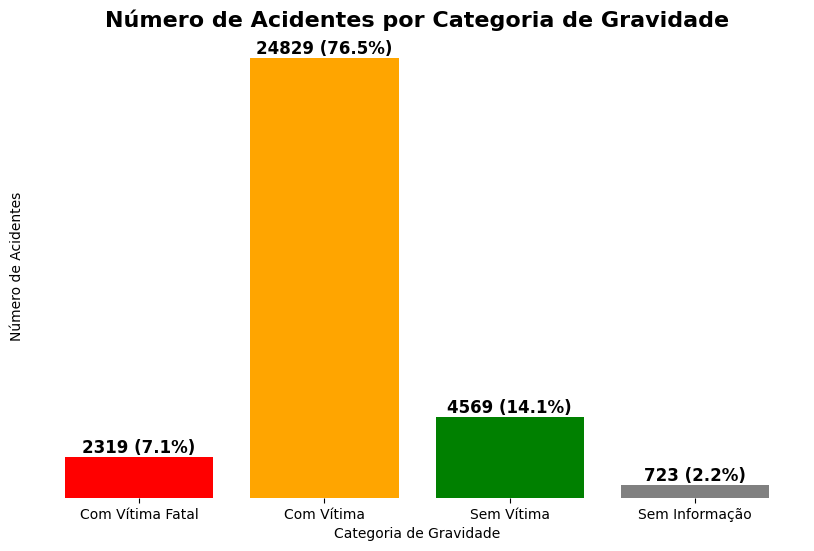

In [31]:
# Crie as colunas para categorias de acidentes
df01_prf['acidente_com_vitima_fatal'] = df01_prf['mortos'] > 0
df01_prf['acidente_com_vitima'] = ((df01_prf['mortos'] == 0) & (df01_prf['feridos'] > 0))
df01_prf['acidente_sem_vitima'] = (df01_prf['mortos'] == 0) & (df01_prf['feridos'] == 0) & (df01_prf['ilesos'] > 0)
df01_prf['acidente_sem_informacao'] = (df01_prf['mortos'] == 0) & (df01_prf['feridos'] == 0) & (df01_prf['ilesos'] == 0) & (df01_prf['ignorados'] > 0)

# Calcule o número de acidentes em cada categoria
acidente_com_vitima_fatal = df01_prf['acidente_com_vitima_fatal'].sum()
acidente_com_vitima = df01_prf['acidente_com_vitima'].sum()
acidente_sem_vitima = df01_prf['acidente_sem_vitima'].sum()
acidente_sem_informacao = df01_prf['acidente_sem_informacao'].sum()
total_acidentes = df01_prf.shape[0]

# Crie um gráfico de barras
plt.figure(figsize=(10, 6))
categorias = ['Com Vítima Fatal', 'Com Vítima', 'Sem Vítima', 'Sem Informação']
quantidades = [acidente_com_vitima_fatal, acidente_com_vitima, acidente_sem_vitima, acidente_sem_informacao]

# Crie as barras
bars = plt.bar(categorias, quantidades, color=['red', 'orange', 'green', 'gray'])

# Adicione os valores acima de cada barra
for bar, quantidade in zip(bars, quantidades):
    height = bar.get_height()
    plt.annotate(f'{quantidade} ({(quantidade/total_acidentes*100):.1f}%)',
                 (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Remova as grades do gráfico
plt.grid(False)

# Remova as referências do eixo Y
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Remova a borda do gráfico
plt.box(on=None)

plt.xlabel('Categoria de Gravidade')
plt.ylabel('Número de Acidentes')
plt.title('Número de Acidentes por Categoria de Gravidade', fontsize=16, fontweight='bold')

plt.show()

* Cerca de **7,1% dos acidentes** registrados resultaram em **vítimas fatais**, totalizando 2.319 registros.

* **76,5% dos acidentes envolveram pelo menos uma vítima**, com ferimentos graves ou leves, totalizando 24.829 registros.

* **14,1% dos acidentes não apresentaram vítimas**, o que equivale a 4.569 acidentes registrados.

* Apenas **2,2% dos registros de acidentes não continham informações** sobre o estado das pessoas envolvidas no acidente.

## **5 - Identificação de Zonas de Alto Risco:**

- Determine áreas (por exemplo, segmentos de rodovias específicos) com alta frequência de acidentes graves.

- Compare com a localização atual dos radares.

In [32]:
df02_prf = df01_prf.copy()
df02_radar = df01_radar.copy()

### **5.1 - Determinar áreas (por exemplo, segmentos de rodovias específicos) com alta frequência de acidentes graves.**

#### **5.1.1 - Agrupamento de Acidentes por Rodovia e KM da Rodovia.**

* Agrupar os dados de acidentes por "br" (número da rodovia) e "km" (quilômetro da rodovia).

* Calcular a frequência de acidentes com diferentes categorias de gravidade (vítima fatal, com vítima, sem vítima, sem informação) em cada segmento de rodovia e por km de cada rodovia.

* Nesse ponto, a variável `acidentes_por_rodovia_km` conterá as informações sobre cada segmento da rodovia em cada km quilômetro. Além disso, o agrupamento realizado irá incluir a contagem de acidentes em cada uma das diferentes categorias de gravidade.

* Após isso, o dataframe é ordenado com base no número de acidentes com vítimas fatais e acidentes com vítimas, em ordem decrescente, e, em seguida, mostra as 10 principais entradas com os maiores valores em ambas as categorias. Isso pode ajudar a identificar as rodovias e quilômetros mais críticos em termos de acidentes graves.

In [33]:
# Formatar valores da variável "br" para que fique igual ao valores da tabela de radares.
df02_prf['br'] = df02_prf['br'].apply(lambda x: f'BR-{int(x):d}' if not pd.isna(x) else x)

# Criar uma variável que representa a rodovia e o km da rodovia
df02_prf['rodovia_km'] = df02_prf['br'].astype(str) + ', km-' + df01_prf['km'].astype(str)

# Agrupe os acidentes por "br" (número da rodovia) e "km" (quilômetro da rodovia)
acidentes_por_rodovia_km = df02_prf.groupby(['rodovia_km'])[
    'acidente_com_vitima_fatal', 'acidente_com_vitima', 'acidente_sem_vitima', 'acidente_sem_informacao'].sum().reset_index()

# Alterar o nome da coluna "br" para "rodovia"
acidentes_por_rodovia_km.rename(columns={'br': 'rodovia'}, inplace=True)

<ipython-input-33-14211c6c24ee>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  acidentes_por_rodovia_km = df02_prf.groupby(['rodovia_km'])[


In [34]:
# Filtrar acidentes por KM das Rodovias ordenando por maior ocorrencia de vítimas fatais e vítimas.
acidentes_por_rodovia_km.sort_values(['acidente_com_vitima_fatal','acidente_com_vitima'], ascending = False).head(10)

,rodovia_km,acidente_com_vitima_fatal,acidente_com_vitima,acidente_sem_vitima,acidente_sem_informacao
1109,"BR-116, km-229",5,26,4,0
245,"BR-101, km-206",4,49,4,1
651,"BR-101, km-68",4,21,7,0
1928,"BR-153, km-113",4,2,0,0
539,"BR-101, km-48",3,34,1,0
719,"BR-101, km-85",3,27,10,0
977,"BR-116, km-11",3,23,5,0
1653,"BR-116, km-8",3,22,3,0
150,"BR-101, km-120",3,21,1,1
1032,"BR-116, km-16",3,20,0,0


**Rodovias e Quilômetros Críticos:** As rodovias "BR-116" e "BR-101" aparecem frequentemente nas 10 principais entradas, o que sugere que essas rodovias têm uma alta incidência de acidentes, tanto com vítimas fatais quanto com vítimas em geral. Os quilômetros exatos, como "km-229" e "km-206", também são indicativos de áreas específicas propensas a acidentes.

**Acidentes com Vítimas Fatais:** A primeira coluna, "acidente_com_vitima_fatal", mostra a quantidade de acidentes com vítimas fatais. Dentre os registros analisados, a rodovia/km "BR-116, km-229" registrou 5 acidentes com vítimas fatais.

**Acidentes com Vítimas:** A coluna "acidente_com_vitima" mostra a quantidade de acidentes com pelo menos uma vítima, incluindo ferimentos graves ou leves.A "BR-101, km-206" registrou 49 acidentes com vítimas, indicando um alto risco nesse trecho.

**Acidentes Sem Vítimas:** A coluna "acidente_sem_vitima" mostra a quantidade de acidentes sem vítimas. Além de ter 4 acidentes com vítimas fatais e 21 acidentes com vítimas, a "BR-101, km-68" teve 7 acidentes sem vítimas.

**Falta de Informação:** A coluna "acidente_sem_informacao" indica a quantidade de acidentes em que não havia informações disponíveis. A maioria das entradas não possui acidentes sem informação, o que sugere um bom registro de dados.

Em resumo, essa análise destaca as rodovias e quilômetros que exigem atenção especial devido ao alto número de acidentes com vítimas fatais e com vítimas em geral. Essas informações podem ser úteis para direcionar esforços de segurança e tomar medidas para reduzir a incidência de acidentes nessas áreas críticas.

### **5.2 - Comparar com a localização atual dos radares.**

Para esta análise, sera necessário envolver o cruzamento de informações sobre acidentes de trânsito em rodovias federais com dados de radares localizados nessas rodovias. Para isso, foram realizadas as etapas abaixo:

* **Criação da Variável "rodovia_km":** Foi criada uma nova variável chamada "rodovia_km" no df02_radar. Essa variável combina informações da "rodovia" e do "km" da rodovia, transformando essas informações em uma única identificação para cada radar.

* **Agrupamento de Radares por "rodovia" e "km":** Os radares foram agrupados com base na variável "rodovia_km" para calcular a contagem de radares em cada km das rodovias. O resultado foi armazenado no DataFrame radares_por_rodovia_km, incluindo a quantidade de radares em cada grupo.

* **União de Dados de Acidentes e Radares:** Os dados de acidentes (anteriormente analisados) e os dados de radares foram unidos por meio da variável "rodovia_km", garantindo que as informações correspondessem às mesmas localizações nas rodovias.

* **Preenchimento de Valores NaN:** Como nem todos os locais de acidentes tinham radares correspondentes, os valores NaN (sem correspondência) na tabela resultante foram preenchidos com "0". Isso significa que, quando não havia radar em um local de acidente, o número de radares foi considerado zero.

* **Seleção de Colunas Relevantes:** A tabela resultante foi reduzida às colunas mais relevantes, incluindo "rodovia_km," a quantidade de acidentes com vítimas fatais, a quantidade de acidentes com vítimas e a quantidade de radares.

* **Top 10 Rodovias com Mais Acidentes Graves:** A tabela final foi classificada com base na quantidade de acidentes com vítimas fatais e a quantidade de acidentes com vítimas, em ordem decrescente. Os 10 principais resultados representam as rodovias e quilômetros com os maiores números de acidentes graves. Com isso, é possível avaliar a quantidade de radar nesses trechos de rodovia considerados mais críticos.

Essa análise pode fornecer insights valiosos sobre as áreas mais críticas em termos de acidentes de trânsito em rodovias federais e destacar onde a presença de radares pode ser particularmente importante para melhorar a segurança das rodovias.

In [35]:
# Criar uma variável que representa a rodovia e o km da rodovia
df02_radar['rodovia_km'] = df02_radar['rodovia'].astype(str) + ', km-' + df01_prf['km'].astype(str)

# Agrupar os radares por "rodovia" e "km" e calcule a contagem de radares em cada grupo
radares_por_rodovia_km = df02_radar.groupby(['rodovia_km']).size().reset_index(name='quantidade_radares')

In [36]:
# Realizar o join entre as tabelas de acidentes e radares
acidentes_radar_por_rodovia = acidentes_por_rodovia_km.merge(radares_por_rodovia_km, on=['rodovia_km'], how='left')

# Preencher os valores NaN (sem correspondência de radares) com "0"
acidentes_radar_por_rodovia.fillna(0, inplace=True)

In [37]:
selec_colunas = ['rodovia_km','acidente_com_vitima_fatal','acidente_com_vitima','quantidade_radares']

top_10_rodovias = acidentes_radar_por_rodovia[selec_colunas].sort_values(['acidente_com_vitima_fatal','acidente_com_vitima'], ascending = False).head(10)
top_10_rodovias

,rodovia_km,acidente_com_vitima_fatal,acidente_com_vitima,quantidade_radares
1109,"BR-116, km-229",5,26,0.0
245,"BR-101, km-206",4,49,0.0
651,"BR-101, km-68",4,21,0.0
1928,"BR-153, km-113",4,2,1.0
539,"BR-101, km-48",3,34,0.0
719,"BR-101, km-85",3,27,1.0
977,"BR-116, km-11",3,23,0.0
1653,"BR-116, km-8",3,22,0.0
150,"BR-101, km-120",3,21,0.0
1032,"BR-116, km-16",3,20,0.0


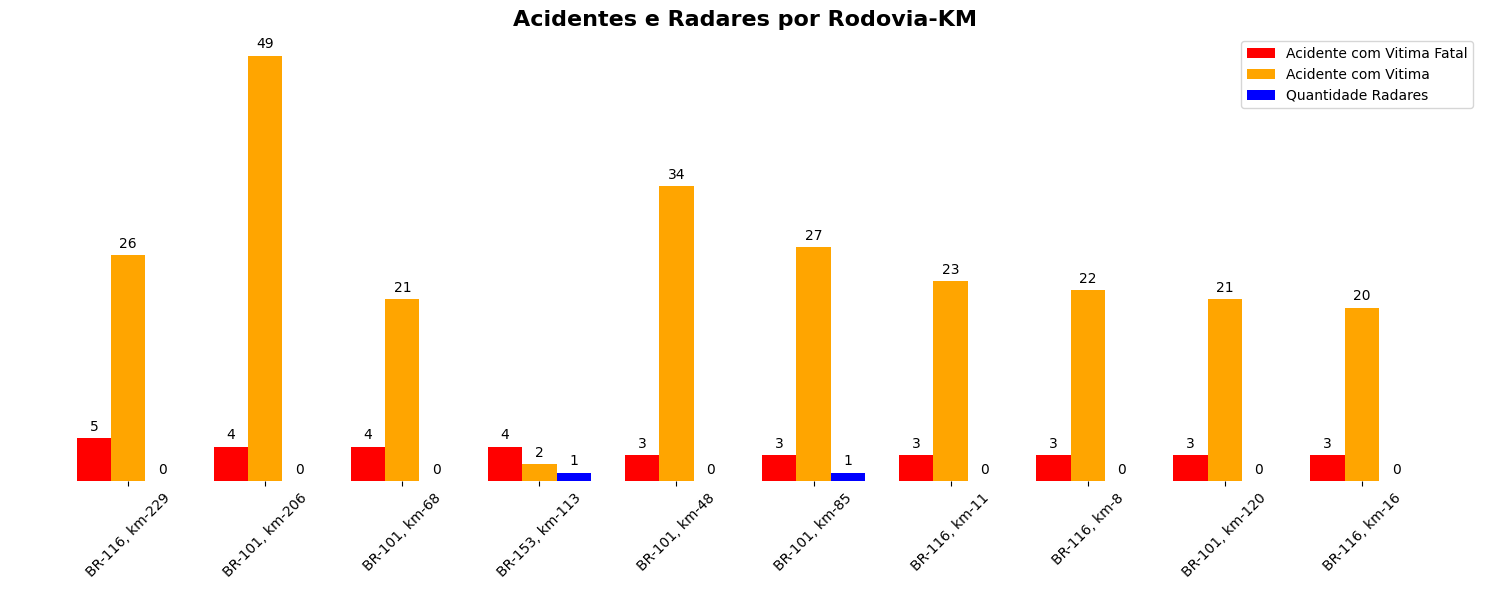

In [38]:
rodovias_km = tuple(top_10_rodovias['rodovia_km'].to_list())
colors = ['red', 'orange', 'blue']
labels = ['Acidente com Vitima Fatal', 'Acidente com Vitima', 'Quantidade Radares']

data = {
    label: {
        'data': tuple(top_10_rodovias[column].to_list()),
        'color': color
    }
    for label, column, color in zip(labels, ['acidente_com_vitima_fatal', 'acidente_com_vitima', 'quantidade_radares'], colors)
}

x = range(len(rodovias_km))
width = 0.25

fig, ax = plt.subplots(figsize=(15, 6))

for i, (label, info) in enumerate(data.items()):
    rects = ax.bar([pos + i * width for pos in x], info['data'], width, label=label, color=info['color'])
    ax.bar_label(rects, padding=3)

ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Acidentes e Radares por Rodovia-KM', fontsize=16, fontweight='bold')
ax.set_xticks([pos + width for pos in x], rodovias_km)
ax.legend(loc='upper right')
plt.xticks(rotation=45)

plt.tight_layout()

Tanto a tabela quanto o gráfico apresentados combinam informações sobre acidentes com a quantidade de radares em cada trecho das rodovias. Vários insights podem ser obtidos com base nesses dados:

* **Quantidade de Radares:** É notável que a maioria dos trechos de rodovia listados não possui radares (quantidade de radares igual a 0.0). Isso pode sugerir uma falta de fiscalização eletrônica nessas áreas, o que pode contribuir para um maior número de acidentes.

* **Rodovia com Maior Número de Acidentes Graves e Sem Radares:** A rodovia BR-116, km-229, teve o maior número de acidentes com vítimas fatais (5) e acidentes com vítimas (26) na lista, mas aparentemente não possui radares.

* **Trechos com Radares:** Alguns trechos, como BR-153, km-113 e BR-101, km-85, têm radares em operação, indicados por uma quantidade de radares igual a 1.0. No entanto, mesmo com a presença de radares, ainda ocorrem acidentes com vítimas.

* **Necessidade de Fiscalização:** A ausência de radares em muitos trechos críticos destaca a necessidade de medidas de fiscalização e controle de velocidade nessas áreas para reduzir o número de acidentes com vítimas.

* **Priorização de Instalação de Radares:** Os órgãos responsáveis pela segurança viária podem considerar a instalação de radares em trechos com alto índice de acidentes graves, como a BR-116, km-229, para melhorar a segurança nessas áreas.

Esses insights mostram a importância da análise dos dados de acidentes em conjunto com a presença de radares para identificar áreas críticas que podem se beneficiar da implementação de medidas de controle de velocidade e fiscalização.

## **6 - Análise de Proximidade:**

- Calcule a distância média dos acidentes até o radar mais próximo.

- Identifique acidentes que ocorreram em locais distantes de qualquer radar.

### **6.1 - Calcular a distância média dos acidentes até o radar mais próximo:**

Nesta análise, calculamos a distância média dos acidentes até o radar mais próximo. Seguimos os seguintes passos:

1. Coletamos as coordenadas geográficas dos acidentes e radares.

2. Usamos a biblioteca geopy para calcular as distâncias.

3. Criamos uma Árvore de Pesquisa Espacial para otimizar as buscas.
  
  - Uma Árvore de Pesquisa Espacial é uma estrutura que ajuda a encontrar informações em espaços multidimensionais, como coordenadas geográficas. Ela é útil para pesquisas eficientes em dados com componentes espaciais.

4. Calculamos as distâncias mínimas para cada acidente.

5. Visualizamos a distribuição das distâncias por meio de um histograma.

Essa análise ajuda a entender como a proximidade dos radares está relacionada aos acidentes, auxiliando na segurança viária.

In [39]:
from scipy.spatial import cKDTree

# Criar a árvore de pesquisa espacial a partir das coordenadas dos radares
radares_coords = df02_radar[['latitude', 'longitude']].to_numpy()
kdtree = cKDTree(radares_coords)

# Função para calcular a distância mínima
def calcular_distancia_minima(coord_acidente, kdtree):
    dist_minima, _ = kdtree.query(coord_acidente, k=1)
    return dist_minima

# Usar apply para calcular as distâncias e adicionar uma coluna 'distancia_km' à tabela de acidentes
df02_prf['distancia_radar_km'] = df02_prf.apply(lambda row: calcular_distancia_minima((row['latitude'], row['longitude']), kdtree), axis=1)

In [40]:
df02_prf['distancia_radar_km'].describe()

count    32440.000000
mean         1.850590
std          2.750035
min          0.000038
25%          0.080804
50%          0.468321
75%          2.248943
max         17.058496
Name: distancia_radar_km, dtype: float64

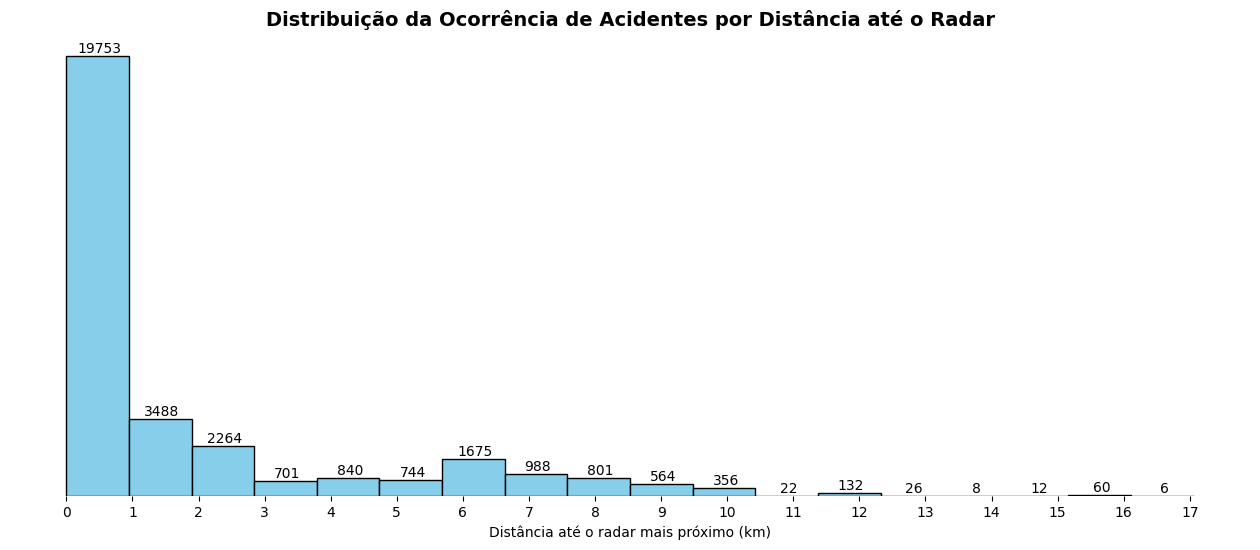

In [41]:
# Defina o número de bins (intervalos) no histograma
num_bins = 18

# Crie o histograma
fig, ax = plt.subplots(figsize=(16, 6))  # Aumente as dimensões da figura
n, bins, patches = ax.hist(df02_prf['distancia_radar_km'], bins=num_bins, color='skyblue', edgecolor='black')

# Adicione rótulos e título ao gráfico
plt.xlabel('Distância até o radar mais próximo (km)')
plt.ylabel('Número de Acidentes')
plt.title('Distribuição da Ocorrência de Acidentes por Distância até o Radar', fontsize=14, fontweight='bold')  # Adicione negrito ao título

# Remova as margens do gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remova a referência da coluna Y
ax.get_yaxis().set_visible(False)

# Adicione as quantidades de cada bin em cima das barras
for i in range(num_bins):
    if n[i] > 0:
        ax.text(bins[i] + 0.5, n[i], str(int(n[i])), ha='center', va='bottom')  # Remova as casas decimais

# Remova as casas decimais dos valores no eixo Y
plt.xticks(range(int(min(df02_prf['distancia_radar_km'])), int(max(df02_prf['distancia_radar_km']) + 1)))

# Exiba o histograma
plt.show()

Para compreender a relação entre a distância dos acidentes em relação aos radares, conduzimos uma análise que revelou insights como:

**Média de Distância:** Em média, os acidentes ocorrem a aproximadamente 1.85 km de distância de um radar. Isso indica que os acidentes geralmente ocorrem a uma distância moderada dos radares.

**Variação Considerável:** A dispersão das distâncias é notável, com acidentes variando desde muito próximos aos radares (0.000038 km) até distâncias consideráveis (máximo de 17.058496 km).

**Proximidade aos Radares:** Um quarto dos acidentes (25%) ocorre a menos de 0.081 km de um radar, enquanto metade dos acidentes (50%) ocorre a menos de 0.468 km de um radar. A maioria dos acidentes (75%) acontece a menos de 2.249 km dos radares.

**Diminuição das Ocorrências:** À medida que as distâncias entre os acidentes e os radares aumentam, a quantidade de ocorrências tende a diminuir. Isso é evidente no histograma.

**Histograma:** O histograma demonstra que a maioria dos acidentes ocorre em distâncias curtas em relação aos radares. Especificamente:

- Intervalo de 0 a 1 km: 19.753 acidentes ocorreram neste intervalo, sugerindo uma alta concentração de ocorrências próximas aos radares.

- Intervalo de 16 a 17 km: Apenas 6 acidentes ocorreram neste intervalo, indicando que as ocorrências a distâncias extremamente longas dos radares são raras.
- Intervalo de 1 a 2 km: Cerca de 3.488 acidentes se encontram neste intervalo.

Essas análises são relevantes para entender a relação entre a localização dos radares e a ocorrência de acidentes. Elas podem fornecer insights para aprimorar a segurança das rodovias, além de otimizar a instalação e monitoramento de radares em locais estratégicos.

### **6.2 - Identificar acidentes que ocorreram em locais distantes de qualquer radar:**

Para determinar acidentes que ocorreram em locais distantes de qualquer radar, estabelecemos um limite de 10 km. Ou seja, qualquer acidente a mais de 10 km de um radar foi marcado como ocorrendo em um local distante de um radar.

Isso ajuda a identificar áreas onde os acidentes ocorrem longe dos radares, fornecendo insights para medidas de segurança nas rodovias.

In [42]:
# Visualizar os acidentes que ocorreram a mair de 10km de distancia de um radar
df_distancias_maiores_que_10 = df02_prf[df02_prf['distancia_radar_km'] > 10]
print(f'A tabela de acidentes conta com {len(df_distancias_maiores_que_10)} acidentes que ocorreram a mais de 10km de um radar.')
print(f'Estes acidentes representam {len(df_distancias_maiores_que_10)*100/df02_prf.shape[0]:.2f}% do total de acidentes registrados.')
df_distancias_maiores_que_10[['id','distancia_radar_km']].sort_values('distancia_radar_km', ascending = False).head(10)


A tabela de acidentes conta com 424 acidentes que ocorreram a mais de 10km de um radar.
Estes acidentes representam 1.31% do total de acidentes registrados.


,id,distancia_radar_km
10460,499984,17.058496
29763,529083,16.861266
26446,524299,16.716899
18769,512931,16.605908
29914,529325,16.393176
26283,524059,16.377125
31788,532048,15.791509
29112,528169,15.789496
29113,528170,15.781167
25811,523301,15.781167


- Há 424 acidentes que ocorreram a mais de 10 km de um radar, o que representa 1.31% do total de acidentes registrados. Isso indica que a maioria dos acidentes ocorre em proximidade com radares.

- Os 10 acidentes mais distantes dos radares, ocorreram à distâncias que variam de 15.78 km a 17.06 km.

Esses pontos podem indicar áreas onde as medidas de segurança podem ser reforçadas, considerando a instalação de radares ou outras estratégias de prevenção de acidentes.

## **7 - Recomendações:**

Com base nos insights obtidos, podemos elencar algumas recomendações e áreas de alto risco que demandam uma melhor cobertura de radares:

- **Instalação de Radares em Trechos Críticos:** Priorizar a instalação de radares em trechos com alto índice de acidentes graves, como a "BR-116, km-229", que registrou 5 acidentes com vítimas fatais. A presença de radares pode contribuir para a redução da velocidade e a prevenção de acidentes.

- **Direcionamento de Verbas Públicas em Rodovias Frequentes:** As rodovias "BR-116" e "BR-101" aparecem frequentemente no top 10 acidentes mais graves. Portanto, é interessante considerar a instalação de radares em certos trechos dessas rodovias, dado que apresentam alta incidência de acidentes, tanto com vítimas fatais quanto com vítimas em geral.

- **Trechos Apresentam Risco Apesar dos Radares:** Mesmo trechos que já possuem radares podem ainda registrar acidentes com vítimas. Neste caso, existe a necessidade de intensificar a fiscalização ou avaliar outras alternativas para manter a segurança da população.

- **Aumentar a Cobertura em Trechos sem Radares:** Foram identificados trechos críticos que não possuem radares, como identificados na etapa "5.2". A falta de fiscalização eletrônica nessas áreas pode contribuir para um maior número de acidentes. É preciso considerar a instalação de radares nesses locais.

- **Monitoramento de Trechos Remotos:** Os acidentes que ocorrem a mais de 10 km de um radar representam uma proporção pequena, mas ainda existente. Por isso, é importante avaliar se esses locais remotos como áreas de alto risco e considerar medidas de segurança, como a instalação de radares ou outras estratégias preventivas.

Essas recomendações visam melhorar a segurança das rodovias, reduzir o número de acidentes com vítimas e garantir uma cobertura eficaz de radares em áreas críticas. É importante realizar análises contínuas dos dados de acidentes e radares para ajustar as medidas de segurança conforme necessário.

## **8 - Análise de Impacto:**

Para Avaliar o impacto da presença de radar na rodovia com a gravidade dos acidentes, iremos fazer um Teste AB a partir das premissas abaixo:

**Hipóteses:**

  * Hipótese Nula (H0): A presença de radares não afeta a gravidade dos acidentes (a média de vítimas fatais é a mesma nos dois grupos).

  * Hipótese Alternativa (H1): A presença de radares afeta a gravidade dos acidentes (a média de vítimas fatais é diferente nos dois grupos).

**Grupos:**

  * Grupo 1: Acidentes próximos a radares.

  * Grupo 2: Acidentes distantes de radares.

**Dados Utilizados:**

  * Taxa de vítimas fatais por acidentes = Quantidade total de vítimas fatais/Quantidade de acidentes.

**Teste Estatístico:**

  * Será considerado um teste t independente (teste t de Student) para comparar as médias de vítimas fatais, graves, leves e ilesos entre os dois grupos. O resultado fornecerá informações sobre se a gravidade dos acidentes difere significativamente entre os grupos.

**Interpretação dos Resultados:**

  * Se o valor p for menor que um nível de significância escolhido (geralmente 0,05), você pode rejeitar a hipótese nula e concluir que a presença de radares afeta a gravidade dos acidentes.

In [43]:
import scipy.stats as stats

# Defina a distância para "proximidade" (em quilômetros)
distancia_proximidade = 0.5

# Divida seus dados em dois grupos
acidentes_proximos = df02_prf[df02_prf['distancia_radar_km'] <= distancia_proximidade]
acidentes_distante = df02_prf[df02_prf['distancia_radar_km'] > distancia_proximidade]

# Taxas de Vítimas Fatais
taxa_vitimas_fatais_proximos = (acidentes_proximos['mortos'].sum() / acidentes_proximos.shape[0] * 100).round(2)
taxa_vitimas_fatais_distante = (acidentes_distante['mortos'].sum() / acidentes_distante.shape[0] * 100).round(2)

# Taxas de Feridos Graves
taxa_feridos_graves_proximos = (acidentes_proximos['feridos_graves'].sum() / acidentes_proximos.shape[0] * 100).round(2)
taxa_feridos_graves_distante = (acidentes_distante['feridos_graves'].sum() / acidentes_distante.shape[0] * 100).round(2)

# Taxas de Feridos Leves
taxa_feridos_leves_proximos = (acidentes_proximos['feridos_leves'].sum() / acidentes_proximos.shape[0] * 100).round(2)
taxa_feridos_leves_distante = (acidentes_distante['feridos_leves'].sum() / acidentes_distante.shape[0] * 100).round(2)

# Taxas de Pessoas Ilesas
taxa_ilesos_proximos = (acidentes_proximos['ilesos'].sum() / acidentes_proximos.shape[0] * 100).round(2)
taxa_ilesos_distante = (acidentes_distante['ilesos'].sum() / acidentes_distante.shape[0] * 100).round(2)

# Testes t independentes e valores p
testes_t_p_valor = []
for gravidade in ['mortos', 'feridos_graves', 'feridos_leves', 'ilesos']:
    t_stat, p_valor = stats.ttest_ind(acidentes_proximos[gravidade], acidentes_distante[gravidade])
    analise = 'Significante' if p_valor < 0.05 else 'Não Significante'
    testes_t_p_valor.append((t_stat, p_valor, analise))

from IPython.display import HTML

# Seus dados da tabela
data = {
    'Gravidade do Acidente': ['Vítimas Fatais', 'Feridos Graves', 'Feridos Leves', 'Pessoas Ilesas'],
    'Próximo a Radares': [taxa_vitimas_fatais_proximos, taxa_feridos_graves_proximos, taxa_feridos_leves_proximos, taxa_ilesos_proximos],
    'Distante de Radares': [taxa_vitimas_fatais_distante, taxa_feridos_graves_distante, taxa_feridos_leves_distante, taxa_ilesos_distante],
    'Valor p': [p for (_, p, _) in testes_t_p_valor],
    'Análise': ['Significante' if p < 0.05 else 'Não Significante' for (_, p, _) in testes_t_p_valor]
}

# Crie o DataFrame
df = pd.DataFrame(data)

# Função para formatar a cor da célula
def color_significance(val):
    if val == 'Significante':
        color = 'green'
    elif val == 'Não Significante':
        color = 'orange'
    else:
        color = 'white'  # cor de fundo padrão
    return f'background-color: {color}'

# Aplica a formatação à coluna "Análise"
styled_df = df.style.format({
    'Próximo a Radares': '{:.2f}',
    'Distante de Radares': '{:.2f}',
    'Valor p': '{:.4f}'
}).applymap(color_significance, subset=['Análise'])

styled_df.set_caption("<strong style='font-size: 16px'>Análise Comparativa das Taxas de Vítimas em Locais Próximos e Distantes de Radares</strong>")

styled_df

,Gravidade do Acidente,Próximo a Radares,Distante de Radares,Valor p,Análise
0,Vítimas Fatais,5.92,10.54,0.0000,Significante
1,Feridos Graves,23.13,32.51,0.0000,Significante
2,Feridos Leves,89.09,85.80,0.0061,Significante
3,Pessoas Ilesas,108.53,104.83,0.0585,Não Significante


Com base nos resultados dos testes t independentes, você pode tirar as seguintes conclusões para cada uma das variáveis que foram testadas:

**Acidentes com Mortos:**

* *Taxa de Vítimas Fatais em Acidentes Próximos a Radares:* 5.92%

* *Taxa de Vítimas Fatais em Acidentes Distante de Radares:* 10.54%

* *Valor p:* 1.56e-37

A diferença nas médias de acidentes com mortos entre os grupos é estatisticamente significativa (valor p muito baixo). Isso sugere que a presença de radares impacta significativamente a ocorrência de acidentes com mortos. A média negativa indica uma menor frequência desses tipos de acidentes em áreas com radares. A taxa de vítimas fatais em acidentes distante de radares é maior do que à taxa dos acidentes próximos a radares.

**Acidentes com Feridos Graves:**

* *Taxa de Feridos Graves em Acidentes Próximos a Radares:* 23.13%

* *Taxa de Feridos Graves em Acidentes Distante de Radares:* 32.51%

* *Valor p:* 1.05e-42

A diferença nas médias de acidentes com feridos graves entre os grupos é estatisticamente significativa (valor p muito baixo). Isso sugere que a presença de radares impacta significativamente a ocorrência de acidentes com feridos graves. A média negativa indica uma menor frequência desses tipos de acidentes em áreas com radares.A taxa de feridos graves em acidentes distante de radares é maior do que à taxa dos acidentes próximos a radares.

**Acidentes com Feridos Leves:**

* *Taxa de Feridos Leves em Acidentes Próximos a Radares:* 89.09%

* *Taxa de Feridos Leves em Acidentes Distante de Radares:* 85.8%

* *Valor p:* 0.0061

A diferença nas médias de acidentes com feridos leves entre os grupos é estatisticamente significativa (valor p baixo). Isso sugere que a presença de radares está associada a uma maior frequência de acidentes com feridos leves. A média positiva indica um aumento na frequência desses tipos de acidentes em áreas com radares. A taxa de feridos leves em acidentes distante de radares é menor do que à taxa dos acidentes próximos a radares.

**Acidentes com Pessoas Ilesas:**

* *Taxa de Pessoas Ilesas em Acidentes Próximos a Radares:* 108.53%

* *Taxa de Pessoas Ilesas em Acidentes Distante de Radares:* 104.83%

* *Valor p:* 0.0585

A diferença nas médias de acidentes com pessoas ilesas entre os grupos não é estatisticamente significativa (valor p moderadamente baixo). Isso sugere que a presença de radares pode não ter um impacto significativo na ocorrência de acidentes com pessoas ilesas. As médias são próximas, e a diferença observada pode ser devida ao acaso. A taxa de pessoas ilesas em acidentes distante de radares é menor do que à taxa dos acidentes próximos a radares.


**Comentários Adicionais:**

Portanto, os novos resultados indicam que a presença de radares continua a impactar significativamente a gravidade e a frequência de acidentes com mortos e acidentes com feridos graves, com uma redução nesses tipos de acidentes. A presença de radares pode não ter um impacto significativo na ocorrência de acidentes com pessoas ilesas, de acordo com os resultados dos testes.

## **9 - Considerações Adicionais:**

- Levar em conta outros fatores que podem influenciar acidentes, como condições climáticas, volume de tráfego, obras na rodovia, entre outros.

- Para isso, analisamos como a ocorrência de acidentes se distribui em relação a diferentes variáveis categóricas. Comparamos a frequência de acidentes próximos (menos de 0.5km) e distantes (mais de 0.5km) de radares para entender se a presença de radares influencia a ocorrência de acidentes em diferentes contextos.

- O resultado são vários gráficos que facilitam a visualização dessas comparações e pode revelar tendências ou padrões nos dados.

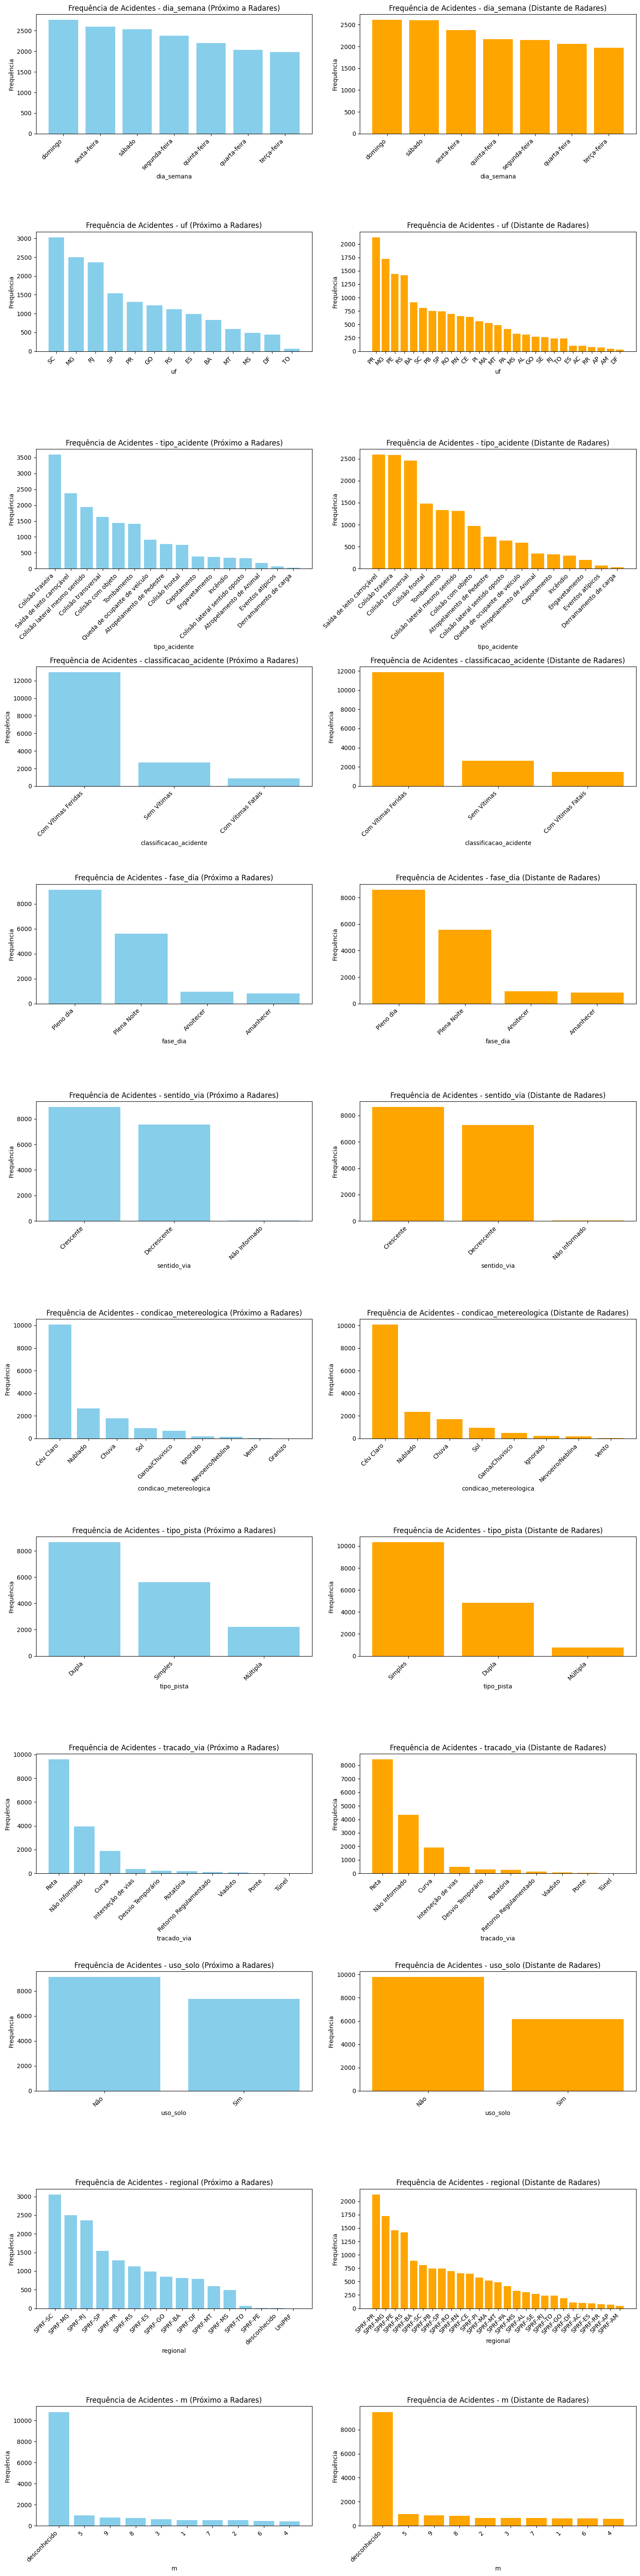

In [44]:
import matplotlib.pyplot as plt

def plot_categorical_frequencies(df, corte_cardinalidade=30):
    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade menor ou igual ao corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = len(variaveis_categoricas)
    n_colunas = 2  # Você pode ajustar o número de colunas conforme necessário

    # Cria subplots
    fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i]

        for j, radar_proximity in enumerate(['Próximo a Radares', 'Distante de Radares']):
            ax[j].set_title(f'Frequência de Acidentes - {var} ({radar_proximity})')
            ax[j].set_xlabel(var)
            ax[j].set_ylabel('Frequência')

            if radar_proximity == 'Próximo a Radares':
                data = df[df['distancia_radar_km'] <= 0.5]
            else:
                data = df[df['distancia_radar_km'] > 0.5]

            x = range(len(data[var].value_counts().index))
            ax[j].bar(x, data[var].value_counts().values, color='skyblue' if radar_proximity == 'Próximo a Radares' else 'orange')
            ax[j].set_xticks(x)
            ax[j].set_xticklabels(data[var].value_counts().index, rotation=45, ha='right')  # Rotação dos rótulos do eixo x

    plt.tight_layout()
    plt.show()

# Chame a função com o DataFrame desejado (no seu caso, df02_prf)
plot_categorical_frequencies(df02_prf, corte_cardinalidade=30)

A partir dos histogramas apresentados, é possível retirar alguns insights relevantes com base nas frequências de variáveis para acidentes próximos e distantes de radares:

**Dia da Semana (dia_semana):**

- Domingo é o dia da semana com o maior número de acidentes em ambos os grupos, seguido de perto por sábado e sexta-feira.
- Não há uma diferença significativa entre os dois grupos em relação ao dia da semana dos acidentes.

**UF (estado):**

- Em acidentes próximos a radares, Santa Catarina (SC) é o estado mais comum, seguido por Minas Gerais (MG) e Rio de Janeiro (RJ).

- Em acidentes distantes de radares, Paraná (PR) lidera, seguido por Minas Gerais (MG) e Pernambuco (PE).

**Tipo de Acidente (tipo_acidente):**

- Em acidentes próximos a radares, "Colisão traseira" é o tipo mais comum, seguido por "Saída de leito carroçável".

- Em acidentes distantes de radares, "Saída de leito carroçável" lidera, seguido por "Colisão traseira".

**Classificação do Acidente (classificacao_acidente):**

- Ambos os grupos têm a maioria dos acidentes classificados como "Com Vítimas Feridas".

- Em acidentes distantes de radares, há uma proporção maior de "Com Vítimas Fatais".

**Tipo de Pista (tipo_pista):**

- Em acidentes próximos a radares, "Dupla" é o tipo mais comum, enquanto em acidentes distantes, "Simples" lidera.

- Essa é outra divergência significativa entre os grupos.

**Regional:**

- A regional "SPRF-SC" é a mais comum em acidentes próximos a radares, enquanto "SPRF-PR" lidera em acidentes distantes.

- Há uma grande divergência nas regionais mais comuns em cada grupo.

## **10 - Visualizações:**

- Criar gráficos e mapas interativos para ilustrar suas descobertas.

In [45]:
import folium
from folium.plugins import MarkerCluster

# Crie um mapa
m = folium.Map(location=[-15.7801, -47.9292], zoom_start=6)  # Coordenadas iniciais e nível de zoom

# Crie um cluster para agrupar os marcadores de acidentes
acidentes_cluster = MarkerCluster(name='Acidentes de Trânsito')

for _, row in df01_prf.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f'Acidente: {row["tipo_acidente"]}',
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(acidentes_cluster)

# Crie um cluster para agrupar os marcadores de radares
radares_cluster = MarkerCluster(name='Radares de Rodovias')

for _, row in df01_radar.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f'Radar: {row["tipo_de_radar"]}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(radares_cluster)

# Adicione os clusters ao mapa
acidentes_cluster.add_to(m)
radares_cluster.add_to(m)

# Adicione um controle de camadas para alternar entre acidentes e radares
folium.LayerControl().add_to(m)

# Salve o mapa em um arquivo HTML
m.save('mapa_acidentes_radares.html')

# Exiba o link para download do arquivo HTML
from IPython.display import HTML
HTML('<a href="mapa_acidentes_radares.html" target="_blank">Clique aqui para baixar o mapa</a>')


## **11 - Conclusão:**

**Principais Insights:**

- **Eficiência dos Radares:** A presença de radares impacta significativamente na redução de acidentes com mortos e feridos graves, com uma correlação estatistica significativa. No entanto, a presença de radares parece não influenciar a ocorrência de acidentes com pessoas ilesas.

- **Pontos Críticos:** A análise identificou áreas de alto risco, como a "BR-116, km-229", que demandam uma melhor cobertura de radares. Além disso, certas rodovias, como "BR-116" e "BR-101", frequentemente registram acidentes graves, sugerindo a necessidade de instalação de radares em trechos específicos.

- **Economia e Justificação de Investimentos:** Além dos aspectos de segurança, é importante considerar o impacto econômico dos acidentes ao avaliar o investimento em radares, pois acidentes rodoviários têm custos substanciais, incluindo custos médicos em regiões onde ocorrem os acidentes.

**Recomendações de Melhorias nas Rodovias Federais:**

- **Instalação de Radares em Trechos Críticos:** Priorizar a instalação de radares em trechos com alta incidência de acidentes graves, como a "BR-116, km-229", para prevenir acidentes com vítimas fatais.

- **Direcionamento de Recursos em Rodovias Frequentes:** Considerar a instalação de radares em trechos específicos de rodovias, como "BR-116" e "BR-101", que frequentemente registram acidentes graves, para reduzir a gravidade desses acidentes.

- **Avaliação Contínua:** Realizar análises contínuas dos dados de acidentes e radares para ajustar as medidas de segurança conforme necessário e garantir que os radares estejam nos lugares certos.

**Sugestões de Medidas de Segurança Além dos Radares:**

- **Sinalização Eficiente:** Investir em sinalização de trânsito eficaz, incluindo placas de advertência, limites de velocidade e sinalização de curvas perigosas, para manter os motoristas informados.

- **Policiamento nas Estradas:** Reforçar o policiamento de trânsito em áreas de alto risco para garantir o cumprimento das leis de trânsito e promover um ambiente seguro.

- **Manutenção de Rodovias:** Priorizar a manutenção adequada das rodovias, incluindo reparos de pavimento e remoção de obstáculos perigosos, para garantir estradas em boas condições.

Essas medidas de segurança, combinadas com a eficácia dos radares, podem contribuir para a redução de acidentes e melhorar a qualidade do trânsito nas rodovias, atendendo aos objetivos de tornar as estradas mais seguras e eficientes.

## **12 - Apresentação:**

- Prepare uma apresentação ou relatório detalhado para os tomadores de decisão, destacando suas descobertas e recomendações.

- Use visualizações claras e eficazes para transmitir suas conclusões.